In [1]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set(font_scale=1.2)

In [2]:
import argopy
from argopy import DataFetcher as ArgoDataFetcher

ds = ArgoDataFetcher(cache=True, cachedir='data/cache').region([-65, -55, -60, -54, 0, 3000, '2017-10', '2018-01']).to_xarray()

In [3]:
ds_points = ds
ds_profiles = ds_points.argo.point2profile()

In [4]:
ds_profiles

<xarray.Dataset>
Dimensions:                (N_PROF: 127, N_LEVELS: 1151)
Coordinates:
  * N_PROF                 (N_PROF) int32 113 119 75 18 98 ... 95 111 81 10 83
  * N_LEVELS               (N_LEVELS) int32 0 1 2 3 4 ... 1147 1148 1149 1150
    LATITUDE               (N_PROF) float64 -58.2 -59.28 -58.5 ... -57.88 -55.35
    LONGITUDE              (N_PROF) float64 -64.22 -62.78 ... -55.57 -56.45
    TIME                   (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 20...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 6 3 6 1 -1 1 1 ... 7 1 2 5 35 2 3 2
    CYCLE_NUMBER           (N_PROF) int32 255 90 20 13 210 98 ... 4 218 35 2 5 2
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'A' 'D'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 7900315 7900661 ... 1901890 3901950
    POSITION_QC            (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_PROF, N_LEVELS) float32 33.93 33.93 ... nan nan
    PSAL_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 2 1 1
    TEMP                   (N_PROF, N_LEVELS) float32 1.792 1.792 ... nan nan
    TEMP_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gian_
    Fetched_date:         2021/11/05
    Fetched_constraints:  [x=-65.00/-55.00; y=-60.00/-54.00; z=0.0/3000.0; t=...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [5]:
#argopy.dashboard()

In [6]:
ds_profiles = ds_profiles.argo.teos10(['SA', 'CT', 'SIG0', 'PV', 'N2'])

In [7]:
ds_profiles

<xarray.Dataset>
Dimensions:                (N_PROF: 127, N_LEVELS: 1151)
Coordinates:
  * N_PROF                 (N_PROF) int32 113 119 75 18 98 ... 95 111 81 10 83
  * N_LEVELS               (N_LEVELS) int32 0 1 2 3 4 ... 1147 1148 1149 1150
    LATITUDE               (N_PROF) float64 -58.2 -59.28 -58.5 ... -57.88 -55.35
    LONGITUDE              (N_PROF) float64 -64.22 -62.78 ... -55.57 -56.45
    TIME                   (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 20...
Data variables: (12/18)
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 6 3 6 1 -1 1 1 ... 7 1 2 5 35 2 3 2
    CYCLE_NUMBER           (N_PROF) int32 255 90 20 13 210 98 ... 4 218 35 2 5 2
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'A' 'D'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 7900315 7900661 ... 1901890 3901950
    POSITION_QC            (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    TIME_QC                (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    CT                     (N_PROF, N_LEVELS) float64 1.797 1.797 ... nan nan
    N2                     (N_PROF, N_LEVELS) float64 nan -2.114e-08 ... nan nan
    PV                     (N_PROF, N_LEVELS) float64 nan 2.669e-13 ... nan nan
    SA                     (N_PROF, N_LEVELS) float64 34.09 34.09 ... nan nan
    SIG0                   (N_PROF, N_LEVELS) float64 27.13 27.13 ... nan nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gian_
    Fetched_date:         2021/11/05
    Fetched_constraints:  [x=-65.00/-55.00; y=-60.00/-54.00; z=0.0/3000.0; t=...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

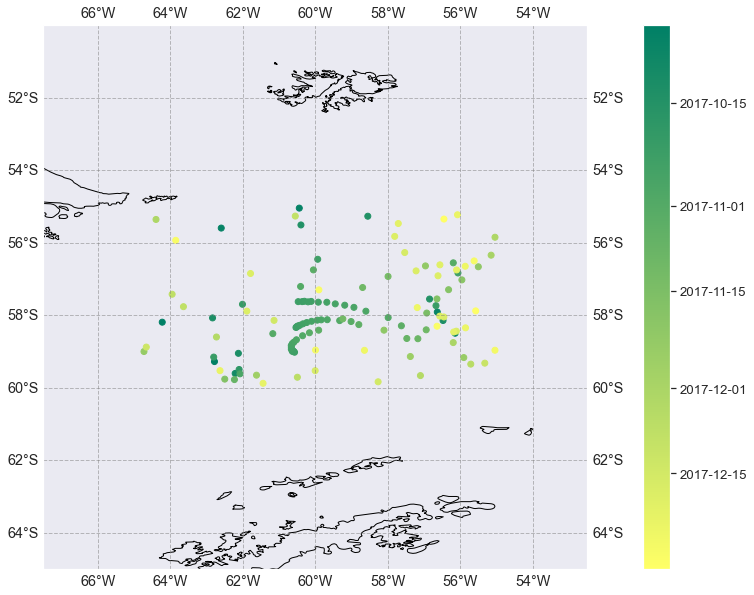

In [8]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-67.5,-52.5,-65,-50])

ax.coastlines()
ax.gridlines(
    draw_labels=True,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )

profiles = ax.scatter(
    ds_profiles.LONGITUDE, 
    ds_profiles.LATITUDE, 
    c=mdates.date2num(ds_profiles.TIME),
    cmap='summer'
    )

cb = plt.colorbar(
    profiles
    )

loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
cb.ax.invert_yaxis()

plt.show()

In [9]:
#ds_profiles = ds_profiles.where(ds_profiles.PRES < 600, drop=True)

In [10]:
pres_diff = ds_profiles.PRES.diff(dim='N_LEVELS')

In [11]:
pres_diff_stacked = pres_diff.stack(stacked = ('N_PROF','N_LEVELS')) #all values stacked in one dimension (for histogram)

Mean: 2.0836236476898193 dbar
Standard deviation: 3.524597406387329 dbar
Maximum: 102.7000732421875 dbar
Minimum: 0.43999481201171875 dbar
Median: 2.0 dbar


<AxesSubplot:ylabel='Count'>

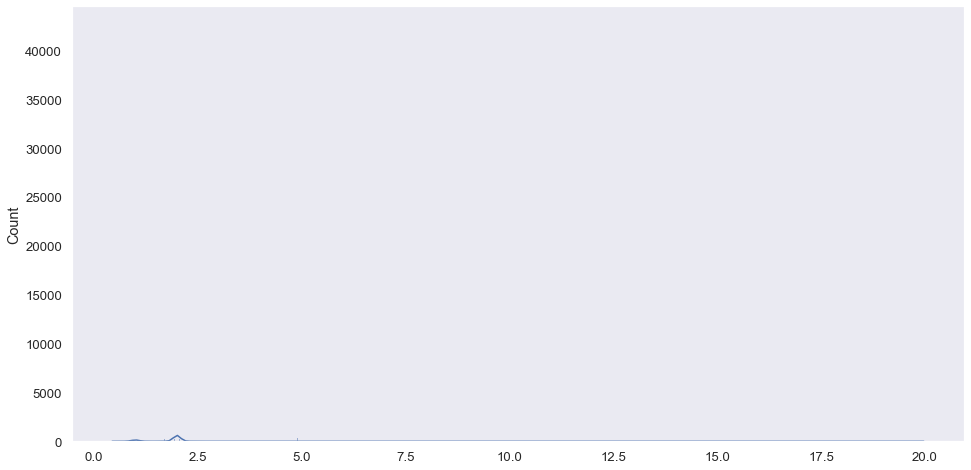

In [12]:
#Looking at the differences between datapoints (dbar) to have a look at the vertical resolution
print('Mean: ' + str(float(pres_diff.mean())) + ' dbar') 
print('Standard deviation: ' + str(float(pres_diff.std())) + ' dbar')
print('Maximum: ' + str(float(pres_diff.max())) + ' dbar')
print('Minimum: ' + str(float(pres_diff.min())) + ' dbar')
print('Median: ' + str(float(pres_diff.median())) + ' dbar')
#Let´s plot bx along the track.
fig, ax1 = plt.subplots(figsize=(16,8))
aux = pres_diff_stacked.where(pres_diff_stacked < 20 ,
    drop=True
)

sns.histplot(data=aux,
    multiple='stack',
    stat='count',
    kde=True,
    #bins=150,
    log_scale=False
    )



In [13]:
ds_bad_profiles = ds_profiles.N_PROF.where(ds_profiles.PRES.diff(dim='N_LEVELS').max(dim='N_LEVELS') > 2.5, drop=True)

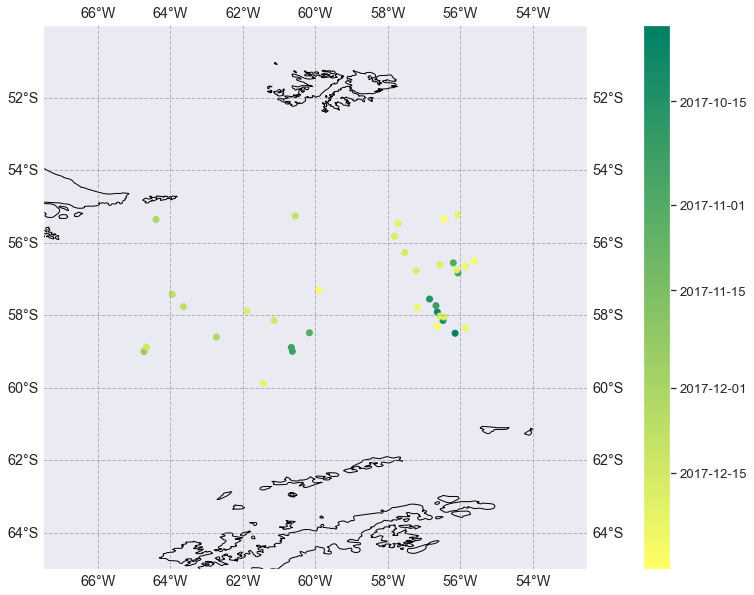

In [14]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-67.5,-52.5,-65,-50])

ax.coastlines()
ax.gridlines(
    draw_labels=True,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )

profiles = ax.scatter(
    ds_bad_profiles.LONGITUDE, 
    ds_bad_profiles.LATITUDE, 
    c=mdates.date2num(ds_bad_profiles.TIME),
    cmap='summer'
    )

cb = plt.colorbar(
    profiles
    )

loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
cb.ax.invert_yaxis()

plt.show()

In [15]:
ds_profiles = ds_profiles.where(ds_profiles.PRES.diff(dim='N_LEVELS').max(dim='N_LEVELS') <= 2.5, drop=True)

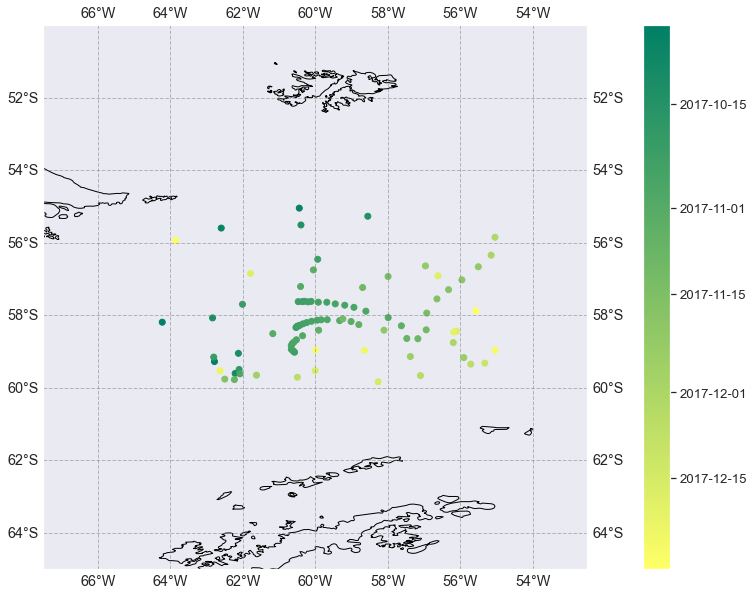

In [16]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-67.5,-52.5,-65,-50])

ax.coastlines()
ax.gridlines(
    draw_labels=True,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )

profiles = ax.scatter(
    ds_profiles.LONGITUDE, 
    ds_profiles.LATITUDE, 
    c=mdates.date2num(ds_profiles.TIME),
    cmap='summer'
    )

cb = plt.colorbar(
    profiles
    )

loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
cb.ax.invert_yaxis()

plt.show()

[Text(0.5, 0, 'Press diff (dbar)')]

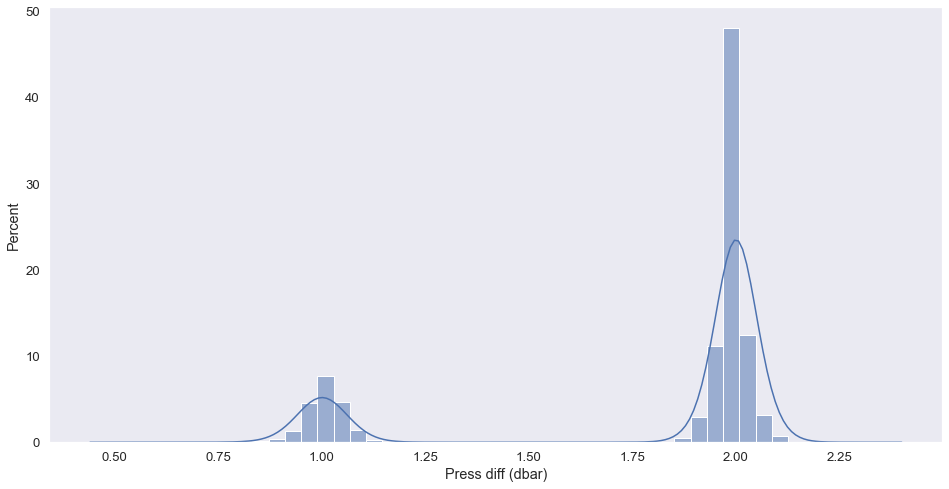

In [17]:
pres_diff = ds_profiles.PRES.diff(dim='N_LEVELS')
pres_diff_stacked = pres_diff.stack(stacked = ('N_PROF','N_LEVELS')) #all values stacked in one dimension (for histogram)

#Let´s plot bx along the track.
fig, ax1 = plt.subplots(figsize=(16,8))

sns.histplot(data=pres_diff_stacked,
    multiple='stack',
    stat='percent',
    kde=True,
    bins=50,
    log_scale=False
    )

ax1.set(xlabel='Press diff (dbar)')

In [18]:
ds_profiles.PRES.max()

<xarray.DataArray 'PRES' ()>
array(2019.98999023)

In [19]:
# Vertical interpolation
pres_levels = np.arange(5,1000,2.5) #I have to check if for any profile I am interpolating on a larger grid
ds_profiles_interp = ds_profiles.argo.interp_std_levels(pres_levels)

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\argopy\utilities.py:769: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  remapped = xr.apply_ufunc(_regular_interp, z, data, z_regridded, **kwargs)


In [20]:
ds_profiles_interp

<xarray.Dataset>
Dimensions:                (N_PROF: 73, PRES_INTERPOLATED: 398)
Coordinates:
  * N_PROF                 (N_PROF) int32 113 119 18 98 84 ... 37 74 92 95 10
    LATITUDE               (N_PROF) float64 -58.2 -59.28 ... -55.94 -57.88
    LONGITUDE              (N_PROF) float64 -64.22 -62.78 ... -63.85 -55.57
    TIME                   (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 20...
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) float64 5.0 7.5 ... 995.0 997.5
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) float64 1.0 6.0 6.0 1.0 ... 7.0 1.0 5.0 3.0
    CT                     (N_PROF, PRES_INTERPOLATED) float64 1.797 ... 1.835
    CYCLE_NUMBER           (N_PROF) float64 255.0 90.0 13.0 ... 264.0 218.0 5.0
    DATA_MODE              (N_PROF) object 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'A'
    DIRECTION              (N_PROF) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    N2                     (N_PROF, PRES_INTERPOLATED) float64 -2.114e-08 ......
    ...                     ...
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 5.0 7.5 ... 997.5
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 33.93 ... 34.71
    PV                     (N_PROF, PRES_INTERPOLATED) float64 2.669e-13 ... ...
    SA                     (N_PROF, PRES_INTERPOLATED) float64 34.09 ... 34.88
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 27.13 ... 27.76
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 1.792 ... 1.895
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gian_
    Fetched_date:         2021/11/05
    Fetched_constraints:  [x=-65.00/-55.00; y=-60.00/-54.00; z=0.0/3000.0; t=...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [21]:
ds_profiles_interp.SIG0

<xarray.DataArray 'SIG0' (N_PROF: 73, PRES_INTERPOLATED: 398)>
array([[27.12902101, 27.12901564, 27.12899169, ..., 27.63869331,
        27.63871333, 27.63873894],
       [27.17945287, 27.17944657, 27.17944023, ..., 27.77857717,
        27.77878116, 27.77893527],
       [26.94626506, 26.94637793, 26.94643924, ..., 27.33620995,
        27.33734811, 27.33767269],
       ...,
       [26.97095439, 26.97100365, 26.9710512 , ..., 27.77688432,
        27.77690062, 27.77698141],
       [26.85722781, 26.85873908, 26.85948416, ..., 27.35204803,
        27.35286391, 27.35427756],
       [26.86933682, 26.88318695, 26.91690198, ..., 27.76068148,
        27.76118714, 27.76147842]])
Coordinates:
  * N_PROF             (N_PROF) int32 113 119 18 98 84 114 ... 97 37 74 92 95 10
    LATITUDE           (N_PROF) float64 -58.2 -59.28 -55.05 ... -55.94 -57.88
    LONGITUDE          (N_PROF) float64 -64.22 -62.78 -60.44 ... -63.85 -55.57
    TIME               (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 2017-1...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 5.0 7.5 10.0 ... 995.0 997.5

In [22]:
ds_profiles_interp.isel({'N_PROF':0})

<xarray.Dataset>
Dimensions:                (PRES_INTERPOLATED: 398)
Coordinates:
    N_PROF                 int32 113
    LATITUDE               float64 -58.2
    LONGITUDE              float64 -64.22
    TIME                   datetime64[ns] 2017-10-02T05:49:06
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) float64 5.0 7.5 ... 995.0 997.5
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  float64 1.0
    CT                     (PRES_INTERPOLATED) float64 1.797 1.797 ... 2.297
    CYCLE_NUMBER           float64 255.0
    DATA_MODE              object 'D'
    DIRECTION              object 'A'
    N2                     (PRES_INTERPOLATED) float64 -2.114e-08 ... 2.245e-07
    ...                     ...
    PRES                   (PRES_INTERPOLATED) float32 5.0 7.5 ... 995.0 997.5
    PSAL                   (PRES_INTERPOLATED) float32 33.93 33.93 ... 34.61
    PV                     (PRES_INTERPOLATED) float64 2.669e-13 ... -2.834e-12
    SA                     (PRES_INTERPOLATED) float64 34.09 34.09 ... 34.78
    SIG0                   (PRES_INTERPOLATED) float64 27.13 27.13 ... 27.64
    TEMP                   (PRES_INTERPOLATED) float32 1.792 1.792 ... 2.36 2.36
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gian_
    Fetched_date:         2021/11/05
    Fetched_constraints:  [x=-65.00/-55.00; y=-60.00/-54.00; z=0.0/3000.0; t=...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [23]:
ds_profiles_interp

<xarray.Dataset>
Dimensions:                (N_PROF: 73, PRES_INTERPOLATED: 398)
Coordinates:
  * N_PROF                 (N_PROF) int32 113 119 18 98 84 ... 37 74 92 95 10
    LATITUDE               (N_PROF) float64 -58.2 -59.28 ... -55.94 -57.88
    LONGITUDE              (N_PROF) float64 -64.22 -62.78 ... -63.85 -55.57
    TIME                   (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 20...
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) float64 5.0 7.5 ... 995.0 997.5
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) float64 1.0 6.0 6.0 1.0 ... 7.0 1.0 5.0 3.0
    CT                     (N_PROF, PRES_INTERPOLATED) float64 1.797 ... 1.835
    CYCLE_NUMBER           (N_PROF) float64 255.0 90.0 13.0 ... 264.0 218.0 5.0
    DATA_MODE              (N_PROF) object 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'A'
    DIRECTION              (N_PROF) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    N2                     (N_PROF, PRES_INTERPOLATED) float64 -2.114e-08 ......
    ...                     ...
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 5.0 7.5 ... 997.5
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 33.93 ... 34.71
    PV                     (N_PROF, PRES_INTERPOLATED) float64 2.669e-13 ... ...
    SA                     (N_PROF, PRES_INTERPOLATED) float64 34.09 ... 34.88
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 27.13 ... 27.76
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 1.792 ... 1.895
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gian_
    Fetched_date:         2021/11/05
    Fetched_constraints:  [x=-65.00/-55.00; y=-60.00/-54.00; z=0.0/3000.0; t=...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

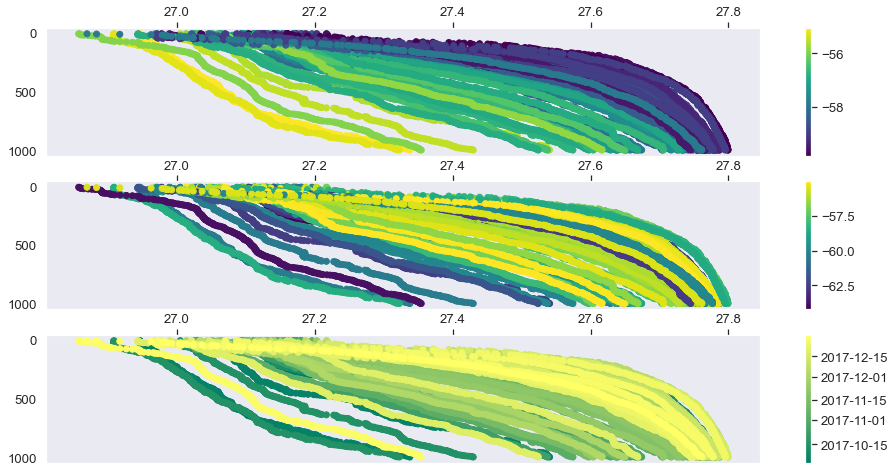

In [24]:
ds_profiles_interp_stacked = ds_profiles_interp.stack(stacked = ('N_PROF','PRES_INTERPOLATED'))


fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(16,8))

sc0 = ax0.scatter(
    ds_profiles_interp_stacked.SIG0,
    ds_profiles_interp_stacked.PRES,
    c=ds_profiles_interp_stacked.LATITUDE,
    cmap='viridis'
)
ax0.xaxis.tick_top()
ax0.invert_yaxis()

cb0 = plt.colorbar(
    sc0,
    ax=ax0
    )


sc1 = ax1.scatter(
    ds_profiles_interp_stacked.SIG0, 
    ds_profiles_interp_stacked.PRES, 
    c=ds_profiles_interp_stacked.LONGITUDE,
    cmap='viridis'
)
ax1.xaxis.tick_top()
ax1.invert_yaxis()

cb1 = plt.colorbar(
    sc1,
    ax=ax1
    )


sc2 = ax2.scatter(
    ds_profiles_interp_stacked.SIG0, 
    ds_profiles_interp_stacked.PRES, 
    c=mdates.date2num(ds_profiles_interp_stacked.TIME),
    cmap='summer'
)
ax2.xaxis.tick_top()
ax2.invert_yaxis()

cb2 = plt.colorbar(
    sc2,
    ax=ax2
    )

loc = mdates.AutoDateLocator()
cb2.ax.yaxis.set_major_locator(loc)
cb2.ax.yaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

In [25]:
ds_profiles_interp.PRES.where(
    ds_profiles_interp.sel({'PRES_INTERPOLATED':10}).SIG0 - 0.03 > ds_profiles_interp.SIG0 ,
    drop = True
    )

<xarray.DataArray 'PRES' (N_PROF: 2, PRES_INTERPOLATED: 2)>
array([[5. , nan],
       [5. , 7.5]], dtype=float32)
Coordinates:
  * N_PROF             (N_PROF) int32 56 10
    LATITUDE           (N_PROF) float64 -57.3 -57.88
    LONGITUDE          (N_PROF) float64 -56.32 -55.57
    TIME               (N_PROF) datetime64[ns] 2017-11-18T05:17:29 2017-12-29...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 5.0 7.5

In [26]:
ds_profiles_interp.drop_isel({'N_PROF':(56,10)})

<xarray.Dataset>
Dimensions:                (N_PROF: 71, PRES_INTERPOLATED: 398)
Coordinates:
  * N_PROF                 (N_PROF) int32 113 119 18 98 84 ... 37 74 92 95 10
    LATITUDE               (N_PROF) float64 -58.2 -59.28 ... -55.94 -57.88
    LONGITUDE              (N_PROF) float64 -64.22 -62.78 ... -63.85 -55.57
    TIME                   (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 20...
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) float64 5.0 7.5 ... 995.0 997.5
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) float64 1.0 6.0 6.0 1.0 ... 7.0 1.0 5.0 3.0
    CT                     (N_PROF, PRES_INTERPOLATED) float64 1.797 ... 1.835
    CYCLE_NUMBER           (N_PROF) float64 255.0 90.0 13.0 ... 264.0 218.0 5.0
    DATA_MODE              (N_PROF) object 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'A'
    DIRECTION              (N_PROF) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    N2                     (N_PROF, PRES_INTERPOLATED) float64 -2.114e-08 ......
    ...                     ...
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 5.0 7.5 ... 997.5
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 33.93 ... 34.71
    PV                     (N_PROF, PRES_INTERPOLATED) float64 2.669e-13 ... ...
    SA                     (N_PROF, PRES_INTERPOLATED) float64 34.09 ... 34.88
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 27.13 ... 27.76
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 1.792 ... 1.895
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           gian_
    Fetched_date:         2021/11/05
    Fetched_constraints:  [x=-65.00/-55.00; y=-60.00/-54.00; z=0.0/3000.0; t=...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [27]:
#it´s missing the -0.3 bit at the moment (works for my dataset) #NOT WORKING AT THE MOMENT
def calculate_MLD(ds, pres_depth='PRES_INTERPOLATED', rho='SIG0', rho_threshold=0.03, concat_dim='N_PROF'):
    MLD = ds[pres_depth].where(
    ds.sel({pres_depth:10})[rho] + rho_threshold < ds[rho] ,
    drop = True
    )
    aux = []
    for i in range(len(MLD)):
        aux.append(MLD[i].dropna(pres_depth)[0])
    MLD = xr.concat(aux, dim=concat_dim)
    return MLD

In [28]:
MLD = ds_profiles_interp.PRES.where(
    ds_profiles_interp.sel({'PRES_INTERPOLATED':10}).SIG0 + 0.03 < ds_profiles_interp.SIG0 ,
    drop = True
    )
aux = []
for i in range(len(MLD)):
    aux.append(MLD[i].dropna('PRES_INTERPOLATED')[0])
MLD = xr.concat(aux, dim='N_PROF')

In [29]:
MLD

<xarray.DataArray 'PRES' (N_PROF: 73)>
array([262.5, 122.5, 132.5,  92.5, 115. , 192.5, 110. , 120. ,  95. ,
       117.5, 170. ,  62.5,  85. ,  95. ,  70. ,  67.5,  72.5, 110. ,
        87.5,  65. ,  50. , 107.5,  82.5,  57.5,  47.5,  90. ,  65. ,
        57.5,  70. ,  85. ,  52.5,  92.5,  92.5,  52.5,  60. ,  70. ,
        92.5,  90. ,  65. ,  20. ,  67.5,  80. ,  60. , 100. ,  25. ,
        32.5,  32.5,  17.5,  70. ,  82.5,  70. ,  82.5,  75. ,  65. ,
        27.5,  67.5,  25. ,  57.5,  62.5,  72.5,  17.5,  25. ,  42.5,
        67.5,  30. ,  22.5,  47.5,  45. ,  25. ,  42.5,  47.5,  37.5,
        12.5], dtype=float32)
Coordinates:
  * N_PROF             (N_PROF) int64 113 119 18 98 84 114 ... 97 37 74 92 95 10
    LATITUDE           (N_PROF) float64 -58.2 -59.28 -55.05 ... -55.94 -57.88
    LONGITUDE          (N_PROF) float64 -64.22 -62.78 -60.44 ... -63.85 -55.57
    TIME               (N_PROF) datetime64[ns] 2017-10-02T05:49:06 ... 2017-1...
    PRES_INTERPOLATED  (N_PROF) float64 262.5 122.5 132.5 ... 47.5 37.5 12.5

In [30]:
MLD = ds_profiles_interp.drop_isel({'N_PROF':(56,10)}).PRES.where(
    ds_profiles_interp.sel({'PRES_INTERPOLATED':10}).SIG0 + 0.03 < ds_profiles_interp.SIG0 ,
    drop = True
    )
aux = []
for i in range(len(MLD)):
    aux.append(MLD[i].dropna('PRES_INTERPOLATED')[0])
MLD = xr.concat(aux, dim='N_PROF')

In [31]:
MLD = MLD.swap_dims({'N_PROF':'TIME'})

In [32]:
MLD_cruise = MLD.sel(TIME=slice('2017-10-20','2017-11-15'))

In [33]:
MLD_cruise.TIME

<xarray.DataArray 'TIME' (TIME: 33)>
array(['2017-10-22T05:34:28.000000000', '2017-10-24T02:02:20.000000000',
       '2017-10-25T07:28:04.000000000', '2017-10-25T08:49:45.000000000',
       '2017-10-26T20:06:41.000000000', '2017-10-26T21:15:20.000000000',
       '2017-10-27T00:39:18.000000000', '2017-10-27T14:10:13.000000000',
       '2017-10-28T07:58:56.000000000', '2017-10-28T10:07:04.000000000',
       '2017-10-28T13:00:56.000000000', '2017-10-28T18:50:51.000000000',
       '2017-10-29T02:48:38.000000000', '2017-10-29T04:07:24.000000000',
       '2017-10-29T07:07:02.000000000', '2017-10-31T04:31:40.000000000',
       '2017-10-31T06:16:05.000000000', '2017-10-31T09:42:39.000000000',
       '2017-10-31T15:28:33.000000000', '2017-11-01T05:32:11.000000000',
       '2017-11-02T11:04:14.000000000', '2017-11-02T21:53:31.000000000',
       '2017-11-03T21:32:28.000000000', '2017-11-04T07:13:25.000000000',
       '2017-11-04T12:46:16.000000000', '2017-11-07T11:45:25.000000000',
       '2017-11-07T13:05:40.000000000', '2017-11-08T21:03:31.000000000',
       '2017-11-10T10:03:26.000000000', '2017-11-10T16:48:56.000000000',
       '2017-11-11T05:45:51.000000000', '2017-11-12T17:07:34.000000000',
       '2017-11-14T00:24:33.000000000'], dtype='datetime64[ns]')
Coordinates:
    N_PROF             (TIME) int64 121 100 43 63 45 65 ... 52 117 53 123 102 54
    LATITUDE           (TIME) float64 -59.16 -56.46 -57.64 ... -56.93 -57.94
    LONGITUDE          (TIME) float64 -62.8 -59.93 -59.92 ... -57.99 -56.92
  * TIME               (TIME) datetime64[ns] 2017-10-22T05:34:28 ... 2017-11-...
    PRES_INTERPOLATED  (TIME) float64 62.5 85.0 95.0 70.0 ... 80.0 60.0 100.0
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [1.50682850e+09 1.51465551e+09]
    axis:                 T
    ioos_category:        Time
    long_name:            Julian day (UTC) of the station relative to REFEREN...
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00

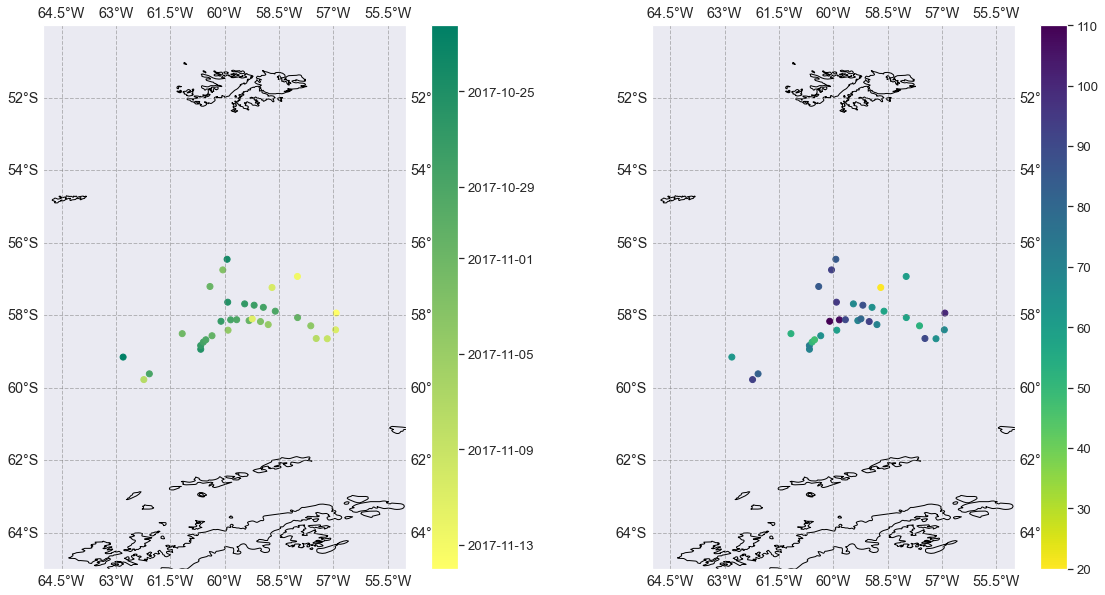

In [34]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,10))

ax0 = plt.subplot(1,2,1, projection=ccrs.PlateCarree(central_longitude=0))
ax0.set_extent([-65,-55,-65,-50])

ax0.coastlines()
ax0.gridlines(
    draw_labels=True,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )

profiles = ax0.scatter(
    MLD_cruise.LONGITUDE, 
    MLD_cruise.LATITUDE, 
    c=mdates.date2num(MLD_cruise.TIME),
    cmap='summer'
    )

cb0 = plt.colorbar(
    profiles
    )

loc = mdates.AutoDateLocator()
cb0.ax.yaxis.set_major_locator(loc)
cb0.ax.yaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
cb0.ax.invert_yaxis()


ax1 = plt.subplot(1,2,2, projection=ccrs.PlateCarree(central_longitude=0))
ax1.set_extent([-65,-55,-65,-50])

ax1.coastlines()
ax1.gridlines(
    draw_labels=True,
    color='gray',
    alpha=0.5,
    linestyle='--'
    )

MLD = ax1.scatter(
    MLD_cruise.LONGITUDE, 
    MLD_cruise.LATITUDE, 
    c=MLD_cruise,
    cmap='viridis_r'
    )

cb1 = plt.colorbar(
    MLD
    )
cb1.ax.yaxis_inverted()
plt.show()

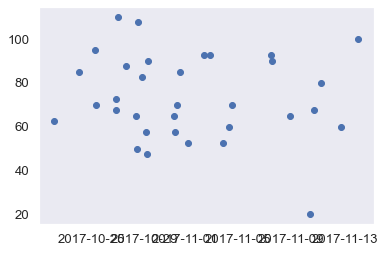

In [35]:
fig, ax = plt.subplots()

ax.scatter(MLD_cruise.TIME, MLD_cruise)